# Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score


# Uploading csv

In [2]:
df = pd.read_csv('Disability_Job_Dataset.csv')

# Basic CommCommand 

## Printing data set

In [3]:
df

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
0,1,Male,19,56437,0,Traumatic Brain Injury,Library Clerk,23,1,07-10-2021
1,2,Male,45,80829,19,Learning Disability,Construction Worker,45,1,07-08-2021
2,3,Female,39,92787,22,Psychiatric Disability,Artist,34,0,02-09-2021
3,4,Female,55,61667,38,Deaf/Hard of Hearing,Mechanic,26,1,15-08-2022
4,5,Male,58,52209,21,Traumatic Brain Injury,Library Clerk,12,0,28-01-2021
...,...,...,...,...,...,...,...,...,...,...
496,497,Male,49,87126,17,Learning Disability,Construction Worker,34,0,02-02-2024
497,498,Female,21,99162,1,Intellectual/Developmental Disability,Warehouse Worker,26,0,03-02-2024
498,499,Male,18,72133,0,Psychiatric Disability,Artist,84,1,04-02-2024
499,500,Male,56,42113,30,Deaf/Hard of Hearing,Craftsperson,23,1,05-02-2024


## Head command

In [4]:
df.head()

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
0,1,Male,19,56437,0,Traumatic Brain Injury,Library Clerk,23,1,07-10-2021
1,2,Male,45,80829,19,Learning Disability,Construction Worker,45,1,07-08-2021
2,3,Female,39,92787,22,Psychiatric Disability,Artist,34,0,02-09-2021
3,4,Female,55,61667,38,Deaf/Hard of Hearing,Mechanic,26,1,15-08-2022
4,5,Male,58,52209,21,Traumatic Brain Injury,Library Clerk,12,0,28-01-2021


## Tail command

In [5]:
df.tail()

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
496,497,Male,49,87126,17,Learning Disability,Construction Worker,34,0,02-02-2024
497,498,Female,21,99162,1,Intellectual/Developmental Disability,Warehouse Worker,26,0,03-02-2024
498,499,Male,18,72133,0,Psychiatric Disability,Artist,84,1,04-02-2024
499,500,Male,56,42113,30,Deaf/Hard of Hearing,Craftsperson,23,1,05-02-2024
500,501,Male,19,56437,0,Traumatic Brain Injury,Library Clerk,23,1,06-02-2024


## Info command

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               501 non-null    int64 
 1   Sex              501 non-null    object
 2   Age              501 non-null    int64 
 3   Income           501 non-null    int64 
 4   Experience       501 non-null    int64 
 5   Disability Type  501 non-null    object
 6   Job Title        501 non-null    object
 7   Score            501 non-null    int64 
 8   Eligibility      501 non-null    int64 
 9   Apply Date       501 non-null    object
dtypes: int64(6), object(4)
memory usage: 39.3+ KB


## Shape command

In [7]:
df.shape

(501, 10)

## size command

In [8]:
df.size

5010

## Describe command

In [9]:
df.describe

<bound method NDFrame.describe of       ID     Sex  Age  Income  Experience  \
0      1    Male   19   56437           0   
1      2    Male   45   80829          19   
2      3  Female   39   92787          22   
3      4  Female   55   61667          38   
4      5    Male   58   52209          21   
..   ...     ...  ...     ...         ...   
496  497    Male   49   87126          17   
497  498  Female   21   99162           1   
498  499    Male   18   72133           0   
499  500    Male   56   42113          30   
500  501    Male   19   56437           0   

                           Disability Type            Job Title  Score  \
0                   Traumatic Brain Injury        Library Clerk     23   
1                      Learning Disability  Construction Worker     45   
2                   Psychiatric Disability               Artist     34   
3                     Deaf/Hard of Hearing             Mechanic     26   
4                   Traumatic Brain Injury        Libra

## Sample command

In [10]:
df.sample(10)

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
208,209,Male,39,34421,12,Physical Disability,Telemarketer,43,1,19-04-2023
197,198,Female,51,78701,30,Physical Disability,Tutor,43,1,08-04-2023
342,343,Male,34,65297,9,Psychiatric Disability,Artist,23,0,31-08-2023
464,465,Male,21,37892,2,Physical Disability,Teacher,56,0,01-01-2024
489,490,Male,36,61636,10,Traumatic Brain Injury,Library Clerk,32,0,26-01-2024
283,284,Female,53,79106,26,Intellectual/Developmental Disability,Gardener,25,1,03-07-2023
81,82,Male,34,56648,13,Blind/Visually Impaired,Massage Therapist,75,1,15-02-2022
292,293,Male,58,39699,26,Cognitive Impairment,Animal Caretaker,87,0,12-07-2023
82,83,Male,38,56649,20,Physical Disability,Telemarketer,23,0,27-09-2021
29,30,Male,20,65152,0,Psychiatric Disability,Artist,5,0,15-08-2021


# Data pre-processing

## Duplicated command

In [11]:
df[df.duplicated()]

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date


## Isnull command

In [12]:
 df.isnull()

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
496,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False,False,False


## Remove the Duplicates

In [13]:
df.drop_duplicates()

,ID,Sex,Age,Income,Experience,Disability Type,Job Title,Score,Eligibility,Apply Date
0,1,Male,19,56437,0,Traumatic Brain Injury,Library Clerk,23,1,07-10-2021
1,2,Male,45,80829,19,Learning Disability,Construction Worker,45,1,07-08-2021
2,3,Female,39,92787,22,Psychiatric Disability,Artist,34,0,02-09-2021
3,4,Female,55,61667,38,Deaf/Hard of Hearing,Mechanic,26,1,15-08-2022
4,5,Male,58,52209,21,Traumatic Brain Injury,Library Clerk,12,0,28-01-2021
...,...,...,...,...,...,...,...,...,...,...
496,497,Male,49,87126,17,Learning Disability,Construction Worker,34,0,02-02-2024
497,498,Female,21,99162,1,Intellectual/Developmental Disability,Warehouse Worker,26,0,03-02-2024
498,499,Male,18,72133,0,Psychiatric Disability,Artist,84,1,04-02-2024
499,500,Male,56,42113,30,Deaf/Hard of Hearing,Craftsperson,23,1,05-02-2024


# data visualization 

## Bar graph of male and female

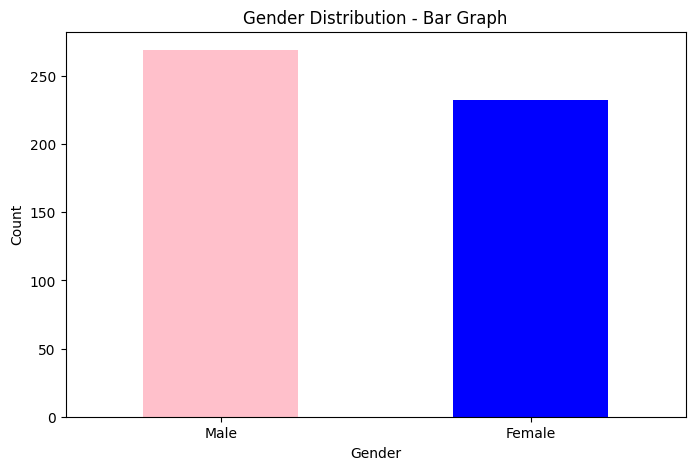

In [14]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Gender Distribution - Bar Graph')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Histrograph of Age Distribution 

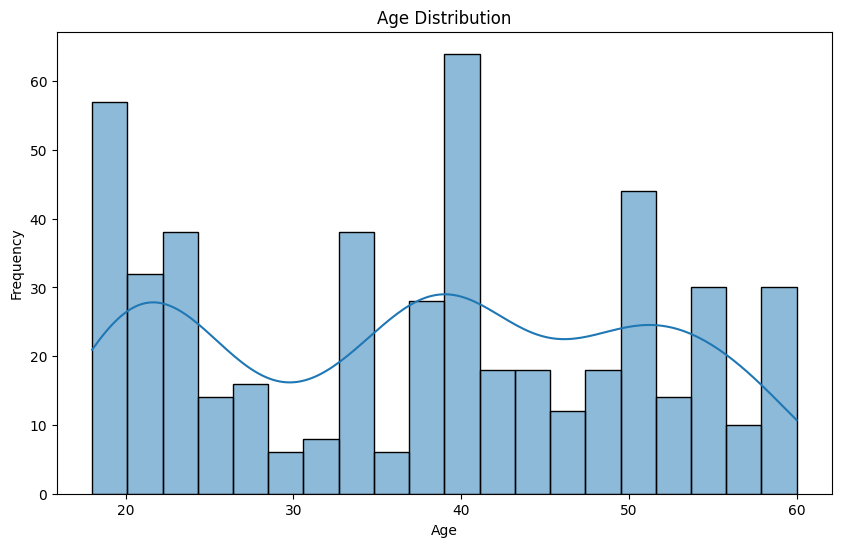

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Box plot of Income Distribution by Disability type

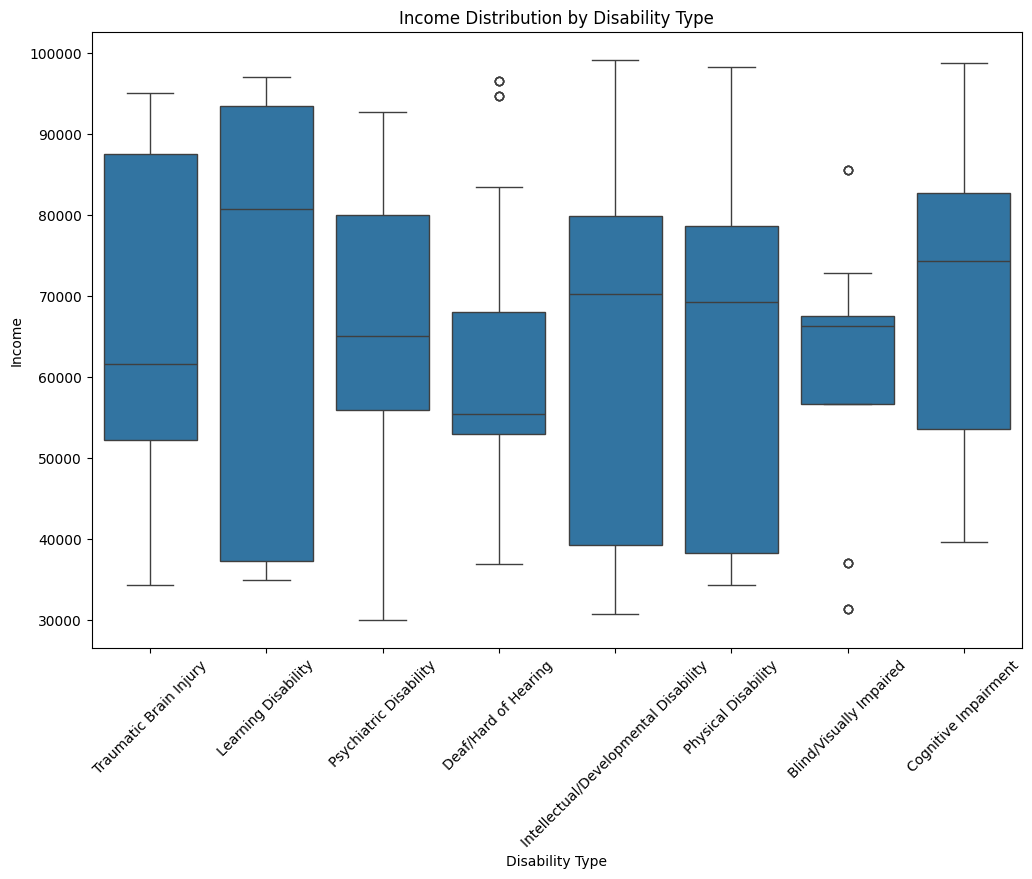

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disability Type', y='Income', data=df)
plt.title('Income Distribution by Disability Type')
plt.xlabel('Disability Type')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

## Bar Plot of Job Titles

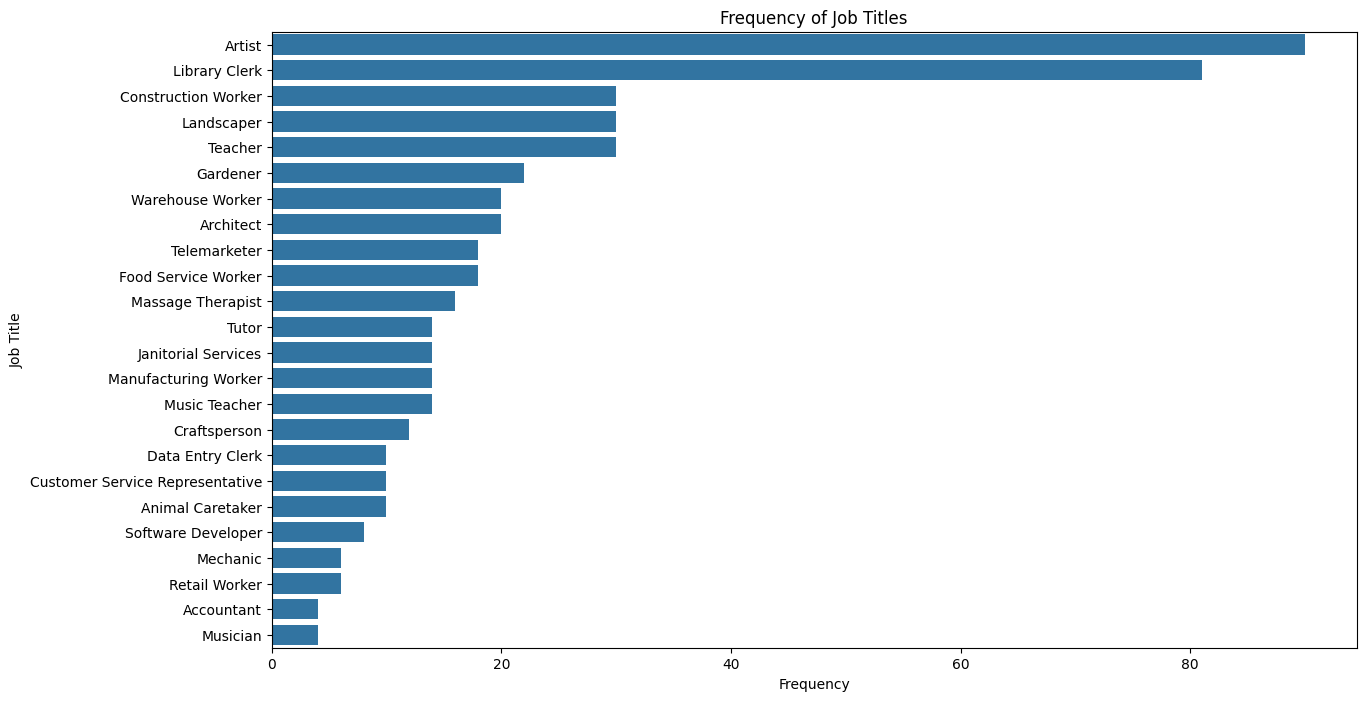

In [17]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Job Title', data=df, order=df['Job Title'].value_counts().index)
plt.title('Frequency of Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

## Scatter Plot of Experience vs. Income

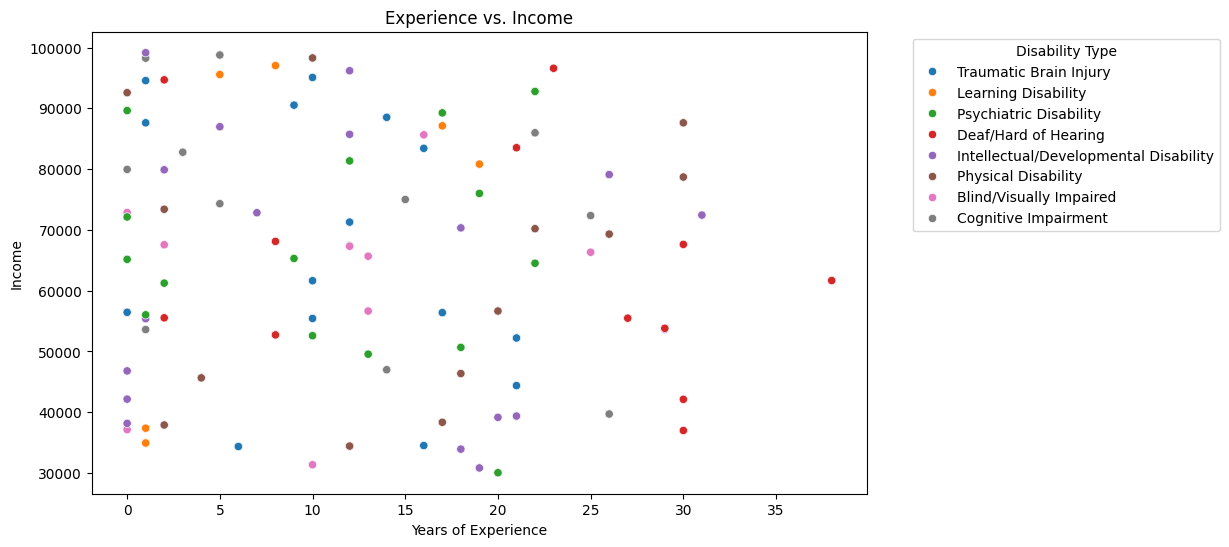

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience', y='Income', hue='Disability Type', data=df)
plt.title('Experience vs. Income')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.legend(title='Disability Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Pie Chart of Disability Types

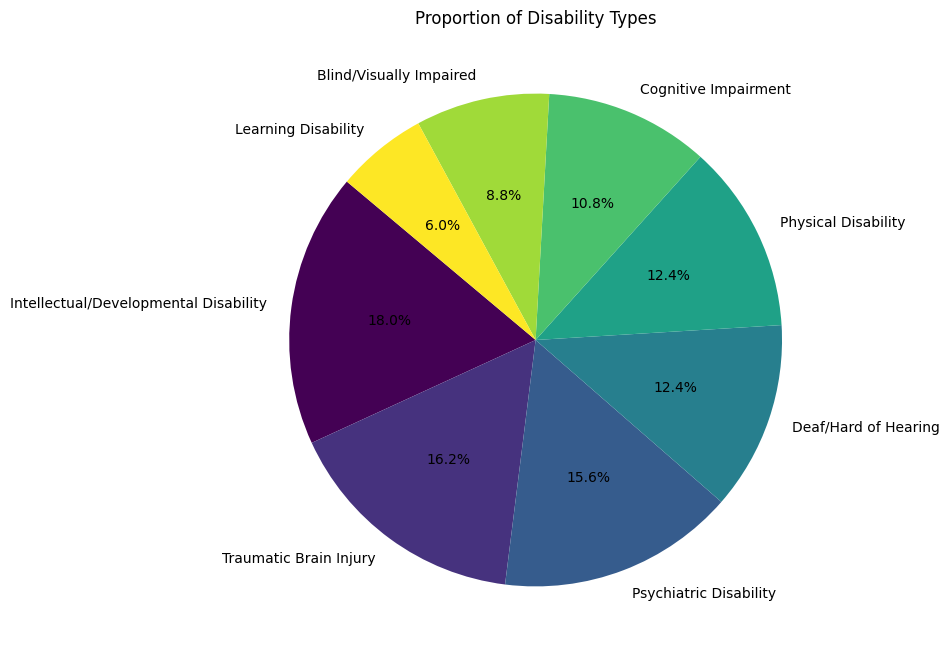

In [19]:
plt.figure(figsize=(8, 8))
df['Disability Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Proportion of Disability Types')
plt.ylabel('')
plt.show()

## Violin Plot of Scores by Disability Type

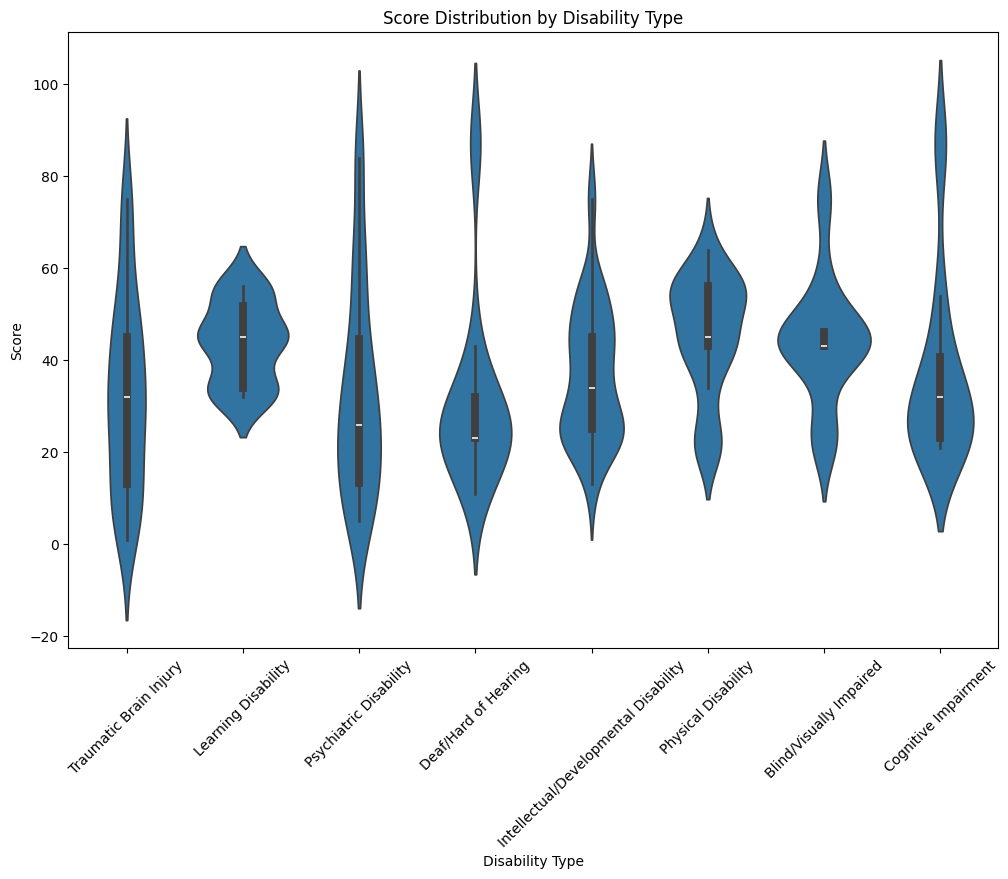

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Disability Type', y='Score', data=df)
plt.title('Score Distribution by Disability Type')
plt.xlabel('Disability Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

correlation_matrix

,ID,Age,Income,Experience,Score,Eligibility
ID,1.000000,-0.025873,0.005960,-0.020501,-0.010451,0.001380
Age,-0.025873,1.000000,-0.071636,0.913091,-0.079337,-0.036866
Income,0.005960,-0.071636,1.000000,-0.100207,-0.139996,0.018786
Experience,-0.020501,0.913091,-0.100207,1.000000,-0.069161,0.064489
Score,-0.010451,-0.079337,-0.139996,-0.069161,1.000000,-0.007690
Eligibility,0.001380,-0.036866,0.018786,0.064489,-0.007690,1.000000


## Heat map

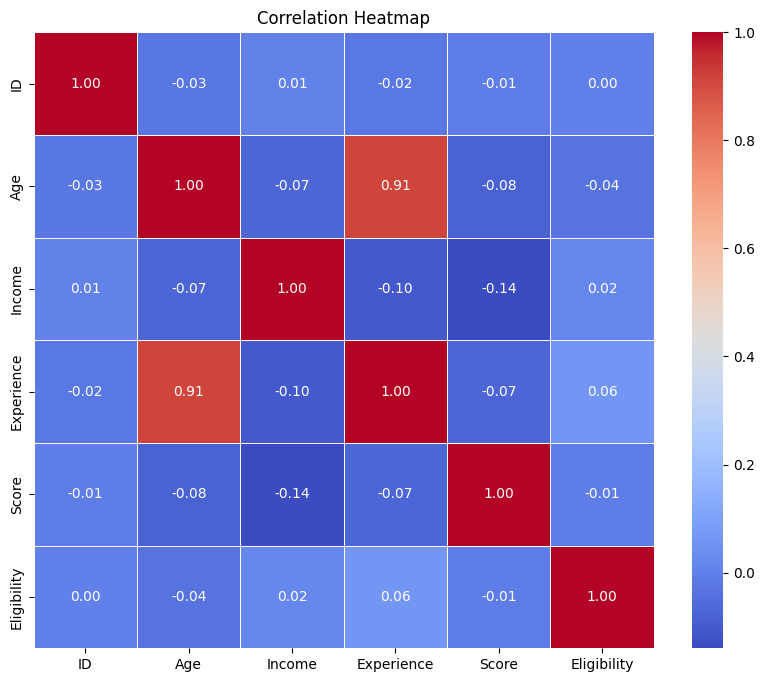

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data cube

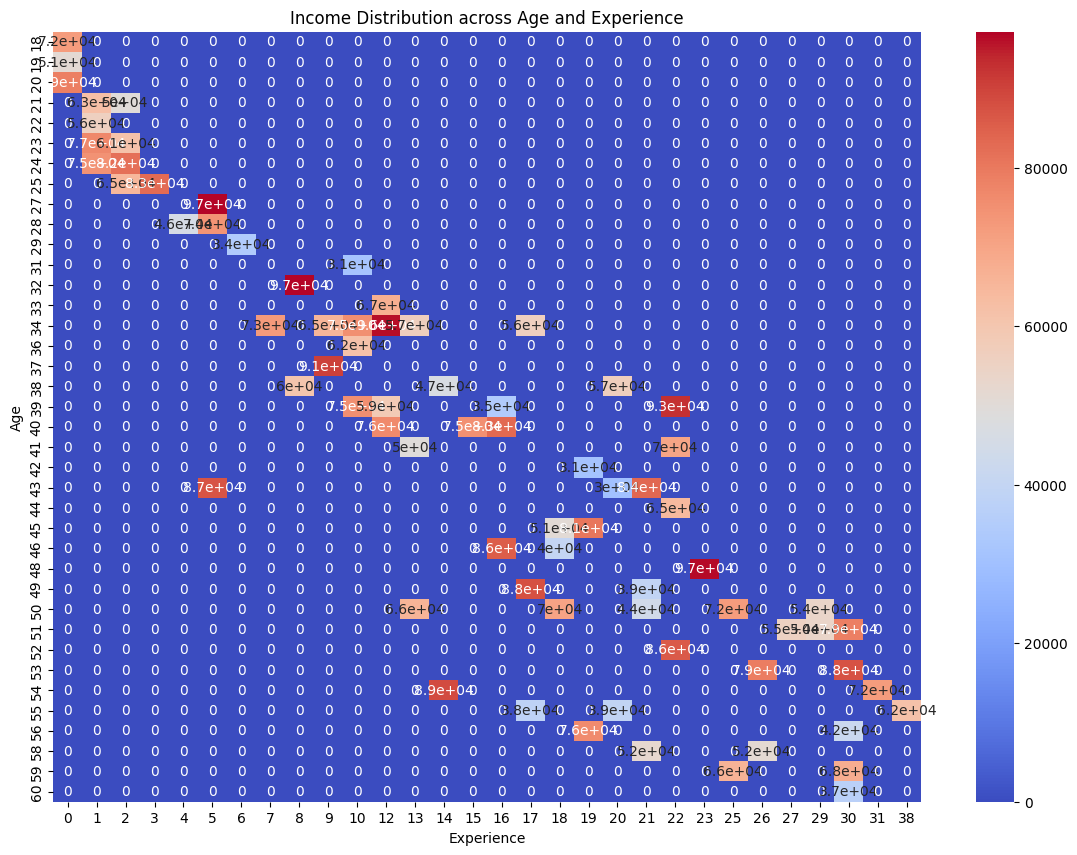

In [23]:
# Creating a data cube
data_cube = pd.pivot_table(df,
                           values='Income',  # Metric to analyze
                           index='Age',  # Row dimension
                           columns='Experience',  # Column dimension
                           aggfunc='mean',  # Aggregation function
                           fill_value=0)  # Fill missing values


# Plotting heatmap for Income distribution
plt.figure(figsize=(14, 10))
sns.heatmap(data_cube, annot=True, cmap='coolwarm')
plt.title('Income Distribution across Age and Experience')
plt.xlabel('Experience')
plt.ylabel('Age')
plt.show()

# Decison Tree

Accuracy: 0.3973509933774834


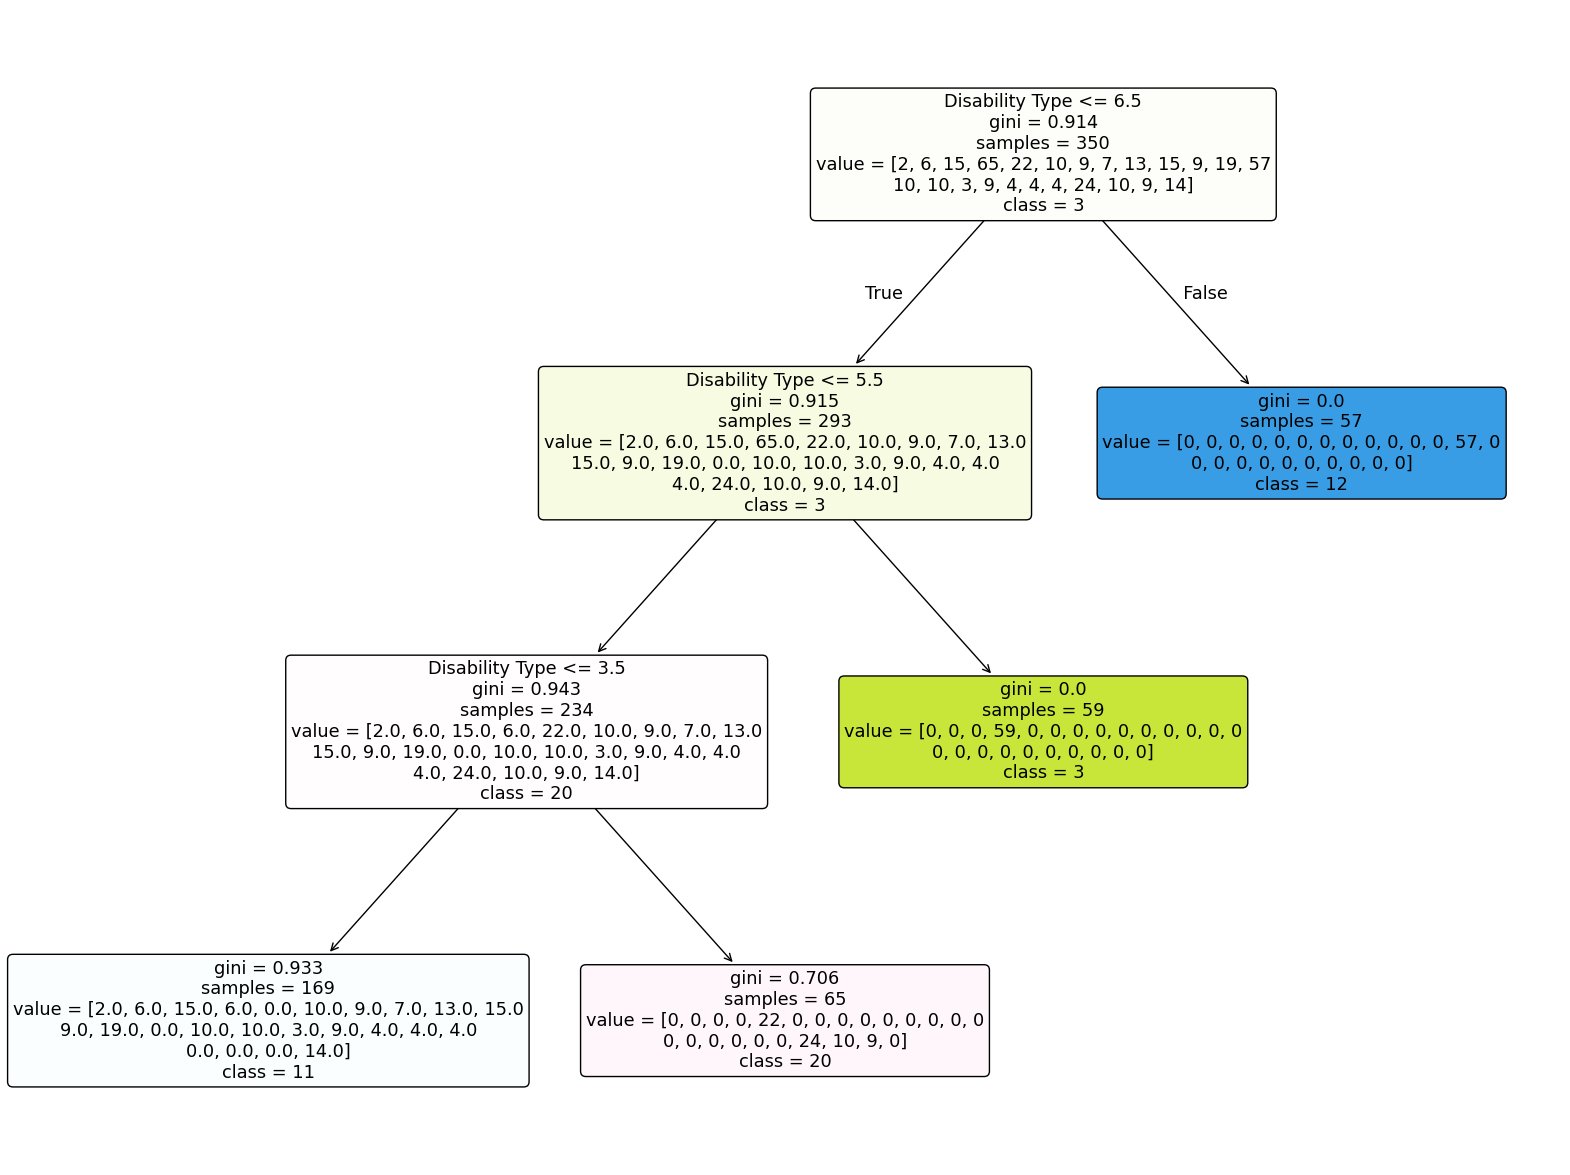

In [24]:
# Convert 'Sex' and 'Disability Type' to numeric using Label Encoding
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
df['Disability Type'] = df['Disability Type'].astype('category').cat.codes
df['Job Title'] = df['Job Title'].astype('category').cat.codes

# Select features and target variable
features = ['Sex', 'Age', 'Income', 'Experience', 'Score', 'Disability Type']
X = df[features]
y = df['Job Title']

# Handle missing values if any (assuming mean strategy here)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets to evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier with max_depth to prevent overfitting
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)
dtree.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = dtree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))

# Convert class names to string
class_names = df['Job Title'].astype('category').cat.categories.astype(str)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(dtree, feature_names=features, class_names=class_names, filled=True, rounded=True)
plt.show()

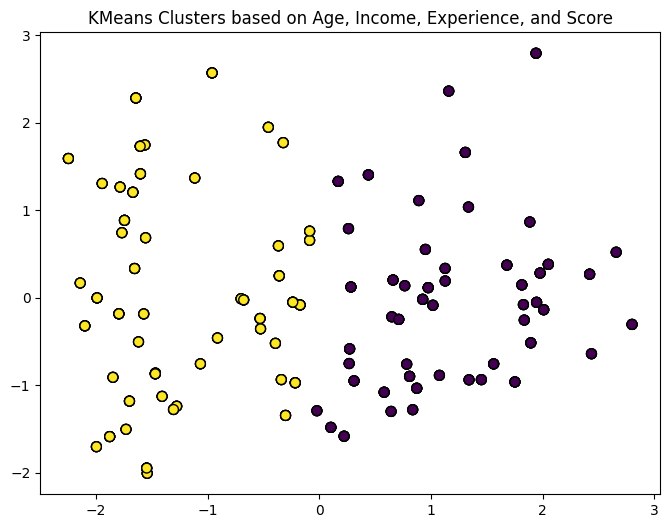

In [31]:
data_cleaned = df[['Age', 'Income', 'Experience', 'Score']].copy()

# Normalize the data (since KMeans and DBSCAN work better with normalized data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_

# Add KMeans labels to the original dataframe
data_cleaned['KMeans_Cluster'] = kmeans_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data_cleaned['DBSCAN_Cluster'] = dbscan_labels

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Plot KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clusters based on Age, Income, Experience, and Score')
plt.show()

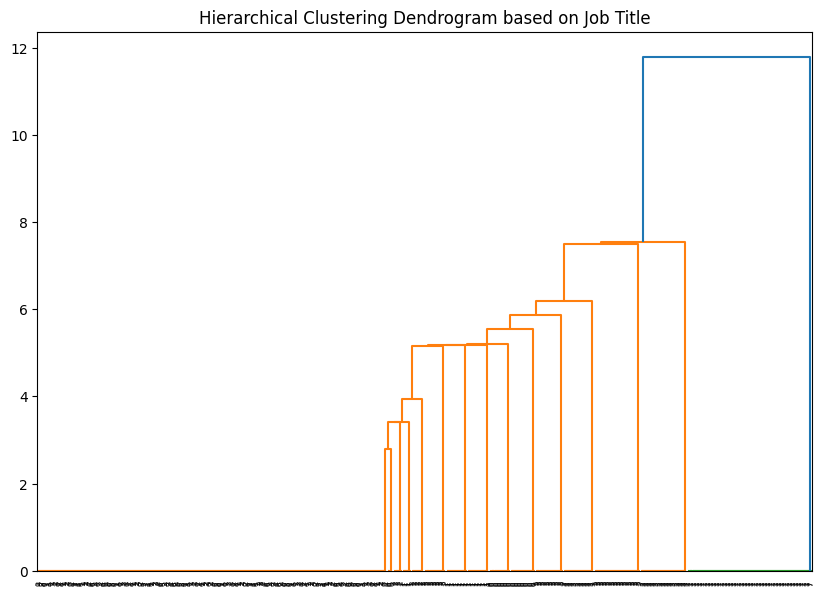

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure 'Job Title' is treated as string
df['Job Title'] = df['Job Title'].astype(str)

# Vectorize the text data (Job Titles) using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Job Title'])

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# Hierarchical Clustering (using Disability Type as labels)
linked = linkage(X.toarray(), method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['Disability Type'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram based on Job Title')
plt.show()

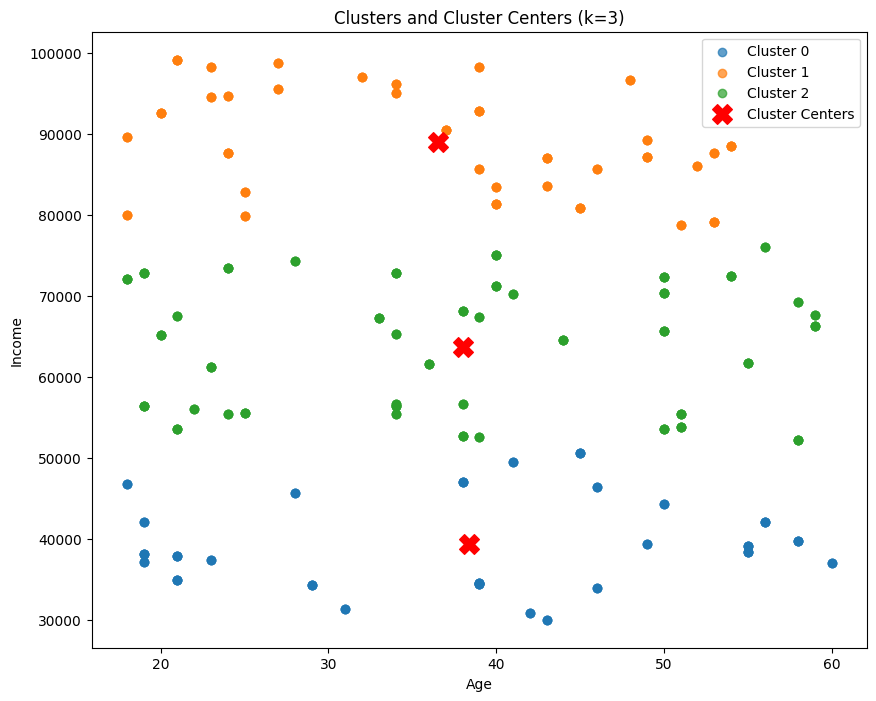

     Age  Income  Experience  Score  KMeans_Cluster
0     19   56437           0     23               2
1     45   80829          19     45               1
2     39   92787          22     34               1
3     55   61667          38     26               2
4     58   52209          21     12               2
..   ...     ...         ...    ...             ...
496   49   87126          17     34               1
497   21   99162           1     26               1
498   18   72133           0     84               2
499   56   42113          30     23               0
500   19   56437           0     23               2

[501 rows x 5 columns]


In [32]:
data_with_features = df[['Age', 'Income', 'Experience', 'Score']].copy()

# Optimal number of clusters (you can adjust this based on the elbow plot)
optimal_k = 3# Change this if needed

# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
kmeans.fit(data_with_features)
df['KMeans_Cluster'] = kmeans.labels_

# Scatter plot of clustered data using two of the features (e.g., Age and Income)
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color
for cluster_num in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == cluster_num]
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot cluster centers
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Income', 'Experience', 'Score'])
plt.scatter(centers_df['Age'], centers_df['Income'], marker='X', s=200, color='red', label='Cluster Centers')

plt.title(f'Clusters and Cluster Centers (k={optimal_k})')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# Display the dataframe with cluster assignments
print(df[['Age', 'Income', 'Experience', 'Score', 'KMeans_Cluster']])
